In [29]:
import os
from glob import glob
from skimage import io
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import numpy as np

In [30]:
dir_data = r'D:\Data\cs-8395-dl\assignment1_data'

In [31]:
filepaths_train = glob(os.path.join(dir_data,'train','*.jpg'))
len(filepaths_train)

105

In [32]:
filepaths_valid = glob(os.path.join(dir_data,'validation','*.jpg'))
len(filepaths_valid)

10

In [33]:
filepaths_label = os.path.join(dir_data,'labels','labels.txt')
with open(filepaths_label,'r') as f:
    label_data = f.readlines()
label_dict={}
for data in label_data:
    name, x, y = data.strip().split(' ')
    label_dict[name]=(float(x),float(y))

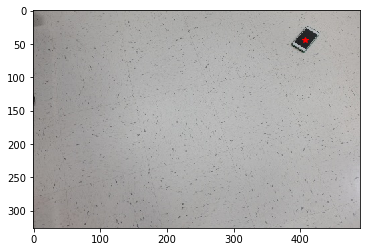

In [34]:
for path in [filepaths_train[0]]:
    img = io.imread(path)
    flname = os.path.basename(path)
    x,y = label_dict[flname]
    plt.imshow(img)
    plt.plot(x*img.shape[1],y*img.shape[0],'r*')
    plt.show()

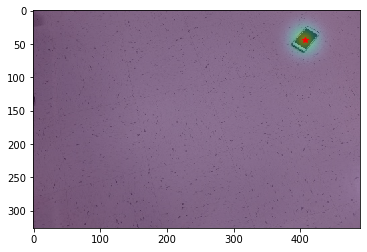

In [35]:
for path in [filepaths_train[0]]:
    img = io.imread(path)
    flname = os.path.basename(path)
    x,y = label_dict[flname]
    dist_map = np.zeros([img.shape[0],img.shape[1]])
    dist_map[int(y*img.shape[0]),int(x*img.shape[1])] = 1
    dist_map = gaussian_filter(dist_map, sigma=15) # w = 2*int(truncate*sigma + 0.5) + 1
    plt.imshow(img)
    plt.plot(x*img.shape[1],y*img.shape[0],'r*')
    plt.imshow(dist_map, alpha=0.4)
    plt.show()

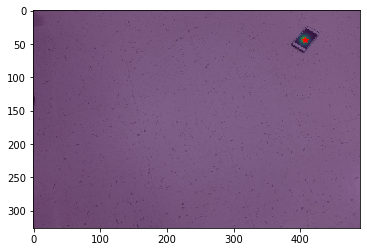

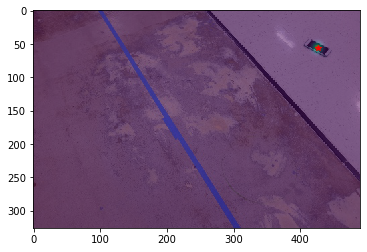

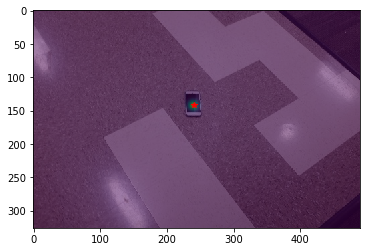

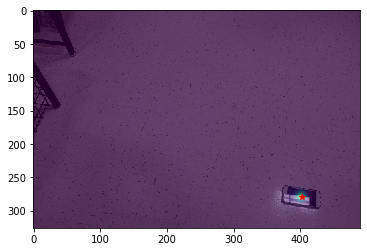

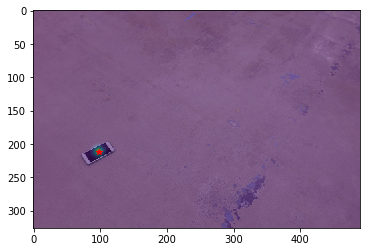

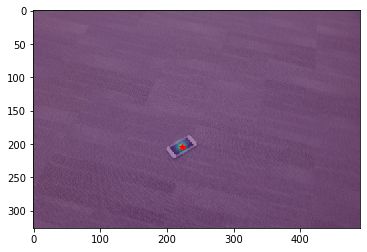

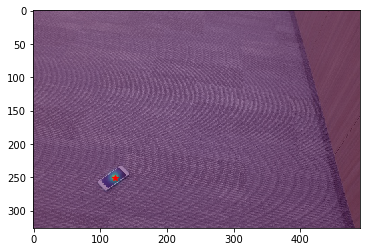

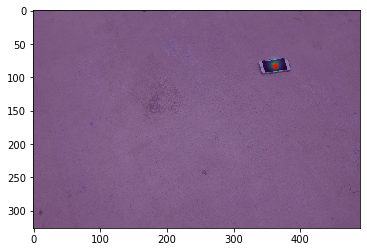

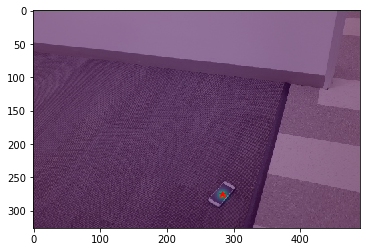

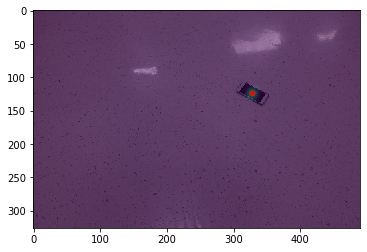

In [51]:
for path in filepaths_train[:10]:
    img = io.imread(path)
    flname = os.path.basename(path)
    x,y = label_dict[flname]
    heat_map = np.zeros([img.shape[0],img.shape[1]])
    heat_map[int(y*img.shape[0]),int(x*img.shape[1])] = 1
    heat_map = gaussian_filter(heat_map, sigma=5,truncate=4) # w = 2*int(truncate*sigma + 0.5) + 1
    heat_map = heat_map/heat_map.max()
    plt.imshow(img)
    plt.plot(x*img.shape[1],y*img.shape[0],'r*')
    plt.imshow(heat_map, alpha=0.5)
    plt.show()

In [43]:
heat_map.min()

0.0

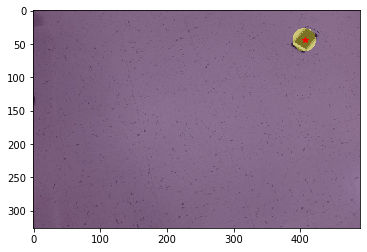

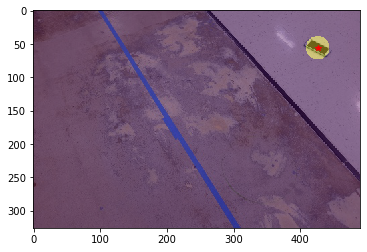

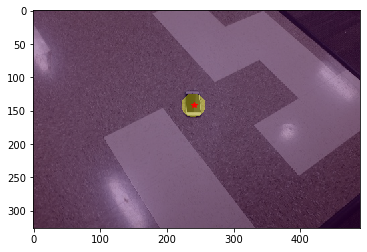

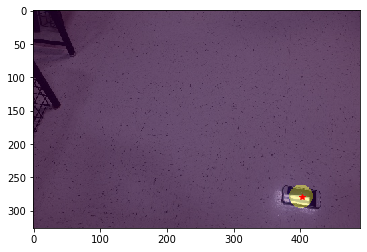

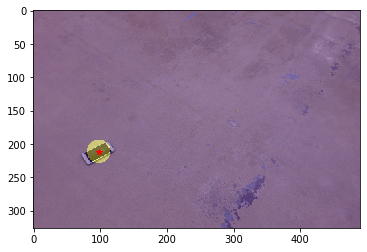

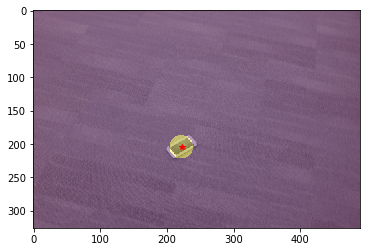

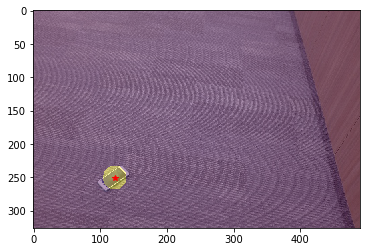

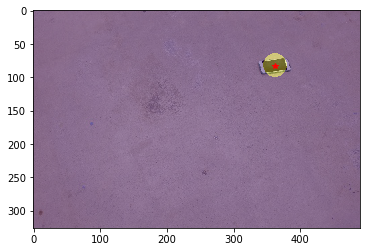

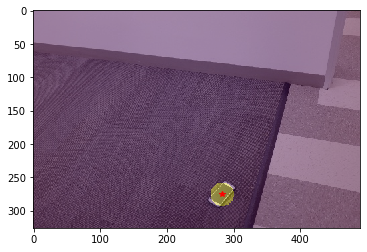

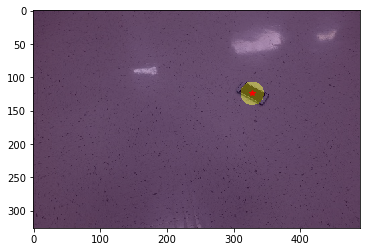

In [44]:
for path in filepaths_train[:10]:
    img = io.imread(path)
    flname = os.path.basename(path)
    x,y = label_dict[flname]
    heat_map = np.zeros([img.shape[0],img.shape[1]])
    heat_map[int(y*img.shape[0]),int(x*img.shape[1])] = 1
    heat_map = gaussian_filter(heat_map, sigma=15) # w = 2*int(truncate*sigma + 0.5) + 1
    bn_map = heat_map>heat_map.max()/2
    plt.imshow(img)
    plt.plot(x*img.shape[1],y*img.shape[0],'r*')
    plt.imshow(bn_map, alpha=0.4)
    plt.show()